In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Loading MNIST dataset

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:

len(X_train)

60000

In [4]:

len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

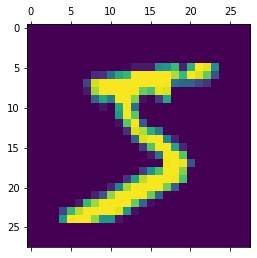

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

## Scaling

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flatten - converting into 1-D

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train.shape, X_train_flattened.shape

((60000, 28, 28), (60000, 784))

#### Very simple neural network with no hidden layers
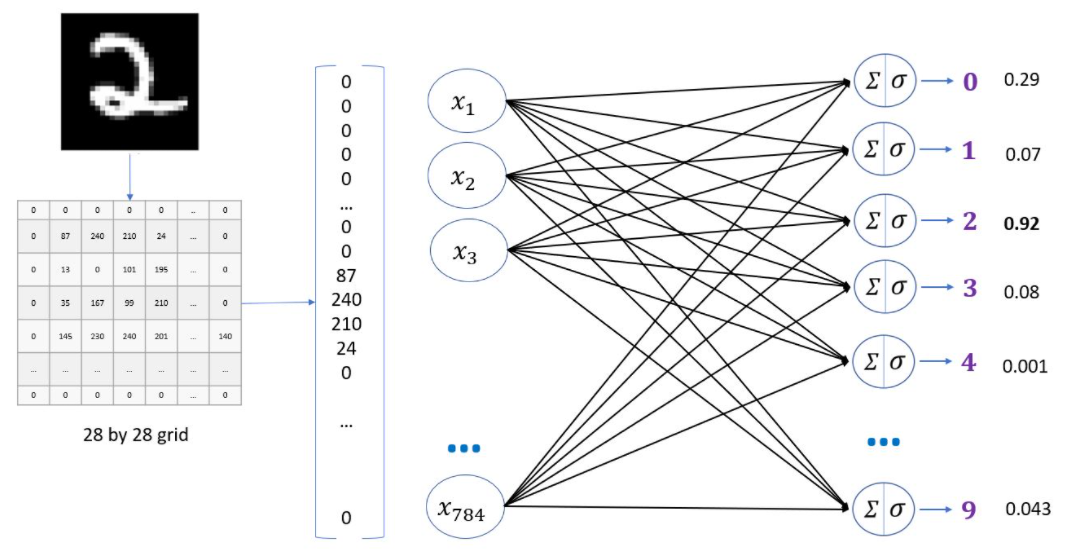

In [13]:
## Building neural network with out any hidden layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4712 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3043 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9256


In [14]:
# evaluating with test data
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.9240


[0.26858100295066833, 0.9240000247955322]

In [15]:

y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.9676000e-02, 3.8165581e-07, 7.6491266e-02, 9.6531737e-01,
       2.1764338e-03, 1.2582639e-01, 1.7502155e-06, 9.9987400e-01,
       1.1095217e-01, 7.6438546e-01], dtype=float32)

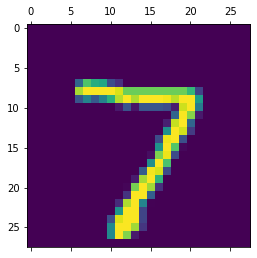

In [16]:
plt.matshow(X_test[0])

### np.argmax finds a maximum element from an array and returns the index of it

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    7,    8,    3,    1,    1],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,   11,  929,   14,    7,    6,   13,   10,   33,    5],
       [   4,    0,   19,  903,    0,   40,    2,   11,   16,   15],
       [   1,    1,    3,    1,  891,    0,   17,    4,    9,   55],
       [   8,    2,    4,   16,    6,  810,   14,    5,   20,    7],
       [   8,    3,    4,    1,    7,   13,  919,    2,    1,    0],
       [   1,    6,   22,    6,    4,    1,    0,  946,    2,   40],
       [   8,   14,    7,   19,    8,   47,   11,   11,  832,   17],
       [  10,    7,    1,    8,   15,    8,    0,   16,    5,  939]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

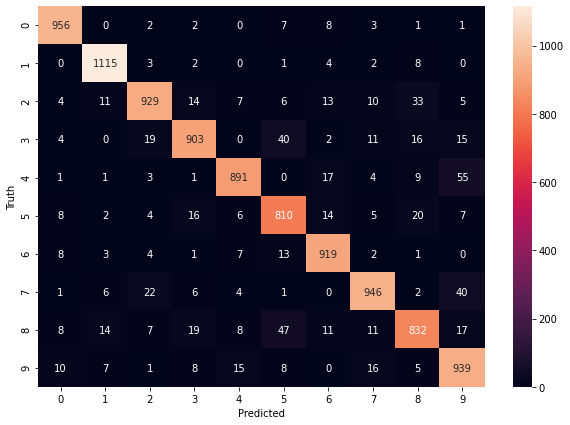

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using one hidden layer

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1250 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9833


### Observe, we are getting better accuracy with hidden layer

In [23]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0784 - accuracy: 0.9756


[0.07842806726694107, 0.975600004196167]

Text(69.0, 0.5, 'Truth')

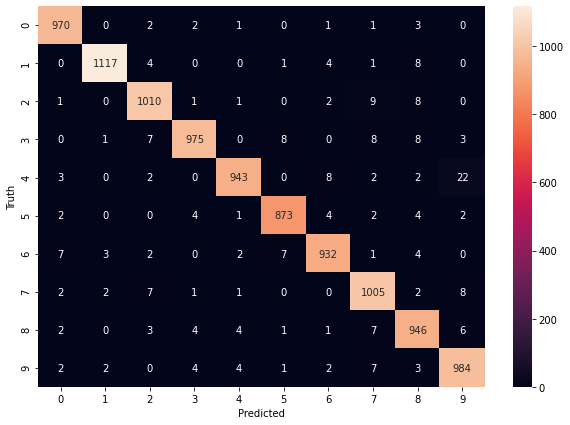

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2750 - accuracy: 0.9201
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1279 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0679 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0915 - accuracy: 0.9769


[0.09151897579431534, 0.9768999814987183]